In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
count_ig_csv = 'emerging_risks_doc_count_instagram.csv'
count_tw_csv = 'emerging_risks_doc_count_twitter.csv'
engagement_fb_csv = 'emerging_risks_local_engagement_facebook.csv'
engagement_ig_csv = 'emerging_risks_local_engagement_instagram.csv'
engagement_tw_csv = 'emerging_risks_local_engagement_twitter.csv'
files = [count_ig_csv, count_tw_csv, engagement_fb_csv, engagement_ig_csv, engagement_tw_csv]

In [4]:
df = pd.read_csv(engagement_tw_csv)

In [6]:
# SET INDEX TO DATETIME
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [51]:
date = df.date
dateless_df = df.drop(columns=['date'])
df_moving_avg = dateless_df.rolling(7).mean()
df_moving_avg['date'] = date
df_moving_avg

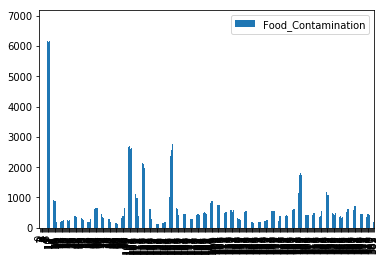

In [55]:
df_moving_avg.plot.bar(y="Food_Contamination")

Text(0.5, 1.0, 'Food Contamination Moving Average')

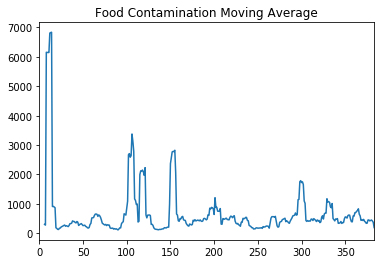

In [56]:
df_moving_avg["Food_Contamination"].plot(x_compat=True)
plt.title("Food Contamination Moving Average")

In [29]:
df_fabi_moving_avg = df_fabi.rolling(7).mean()

In [49]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

#df['Date']= pd.to_datetime(df['date']) 
df_moving_avg['Date']= pd.to_datetime(df_moving_avg['date']) 

X = pd.DataFrame(df_moving_avg.Pesticides).dropna().values

In [50]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [55]:
mod = sm.tsa.statespace.SARIMAX(X,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1494      0.036      4.176      0.000       0.079       0.219
ma.L1          1.0000      1.222      0.818      0.413      -1.395       3.395
ma.S.L12      -1.0017      1.205     -0.831      0.406      -3.364       1.361
sigma2      2.563e+05    3.8e-06   6.74e+10      0.000    2.56e+05    2.56e+05


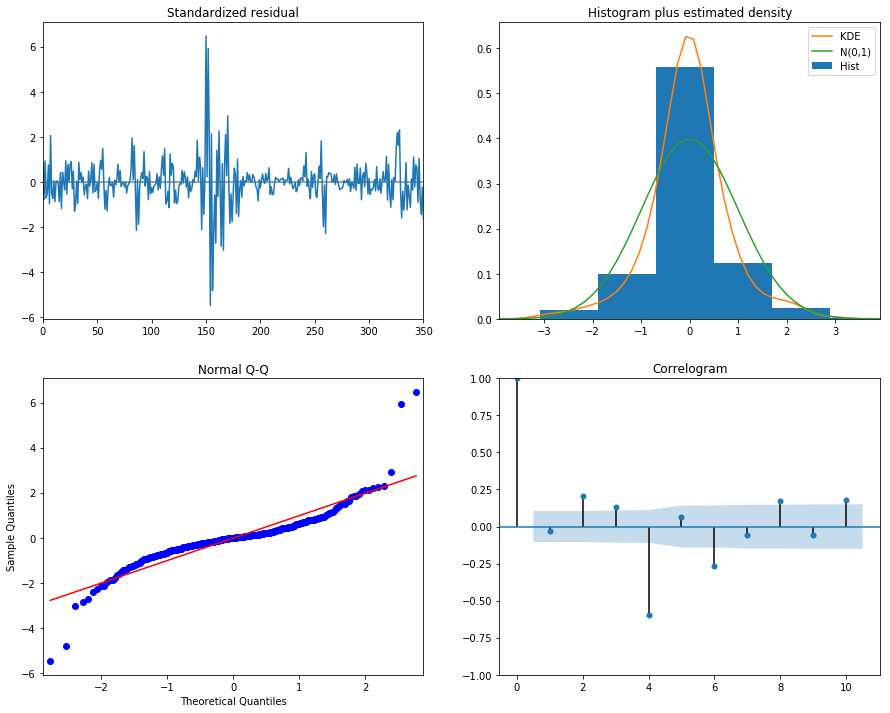

In [56]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\m

Test MSE: 120873.905


c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


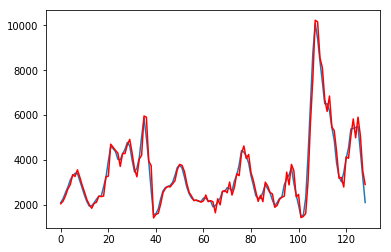

In [51]:
# code from https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ NOT WORKING
# NEED TO SET right order for ARIMA

for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [52]:
# GET RIGHT ORDER FOR ARIMA
# CODE FROM https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
# Define the p, d and q parameters to take any value between 0 and 2
import itertools
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [4]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [53]:
aics = list()
my_res = dict()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(X, # df.Pesticides,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results = mod.fit()
        my_res[results.aic] = f'ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}'
        aics.append(results.aic)
        print("-")
print("SELECT LOWEST SCORE")
for elem in sorted(aics):
    print(my_res[elem])
                              

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


-
-


c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


-
-
-
-
-
-
-
-


c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
SELECT LOWEST SCORE
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:5413.5096354920925
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:5415.183638230004
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:5419.010693784214
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:5419.474839518815
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:5420.535740379705
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:5420.862694886554
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:5520.6906330434795
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:5521.7005707287135
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:5547.57407288763
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:5547.939490788936
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:5549.103579291175
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:5554.50996946849
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:5556.070107699615
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:5559.642029048919
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:5565.969190070989
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:5567.445027039928
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:5571.66289182555

In [ ]:
# TEST STATIONARITY:
from statsmodels.tsa.stattools import adfuller
series = read_csv()
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))